### Group 7:

* Donaire, Rudnick James

* Gonzales, Ryan Joseph

* Moncayo, Ethan Andrew

* Pajaro, Randall Joseph

### 1.) Five Applications of Networkx

#### Transportation / GPS Systems

- Identifying the distance between two places is a problem that graph theory can be utilized to calculate the shortest path between the two places. Assuming that a map can be visualized using a gridded structure, we can use Graph Theory to identify the shortest path between Node A and Node B. This is an algorithm that can be used in various transportation networks such as railways, road works, and some GPS systems.

#### Language Parse

- Language parsing is an important application when it comes to processing grammatical structures of various langauges. Whether that language may be of natural language or programming language, we can use graph theory to identify whether a specific langauge input is following the grammatical rules of that language.

#### Schedules

- Scheduling an event or an examination with hundreds of input requires a lot of consideration (e.g. time, number of slots). Graph theory helps in plotting time schedules of different events. It can be used to plot properly the examination schedule of a student based on their availability while considering the slots of each exam per time.

#### Games

- A lot of games utilizes graph theory to perform certain actions or to generate, solve, or check puzzles. Game concepts that utilizes graph theory ranges from AI Movement to puzzle generators. These graphs are used to determine which actions should be made based on various constraints / rules that is applied to the game.

#### Social Circles / Network

- One of the common ways to use graph theory is in Sociology, specifically social networks. Concepts that graph theory can be used are friend suggestions, identifying family trees, crime investigation, and so on. A lot of these concepts relies on the relationships of two person / groups which can be represented by using a graph. 

### 2.) Using Networkx for Checking and Solving Sudoku Puzzles 

#### (solving easy sudoku puzzles)

#### Importing Libraries

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#### Functions for creating a graph of a sudoku based on n

In [2]:
# creating a sudoku grid with corresponding labels
# default value of a sudoku grid dimension is 3
def create_sudoku(n = 3):
    sudoku = []
    value = 0
    for i in range(pow(n, 2)):
        array = []
        for j in range(pow(n, 2)):
            array.append(value)
            value += 1
    
        sudoku.append(array)
        
    return sudoku

In [3]:
# generating pairs in a row based on a given grid
def generate_row_pairs(grid):
    row_pairs = []
    
    for row in grid: # loops through each row of the grid
        for col in range(len(row)): # loops through the columns of the row
            for cell in range(col, len(row)): # gets the cell of the grid to pair it up with other cells
                if col == cell: continue # skips indexes that are equal
                row_pairs.append([row[col], row[cell]]) # creates pairs 
    
    return row_pairs

In [4]:
# generating pairs in a column based on a given grid
def generate_col_pairs(grid):
    col_pairs = []
    
    for col in range(len(grid)): # loops through the length of the dimensions of the grid
        for row in range(len(grid)): # loops through the row of the grid
            for cell in range(row, len(grid)): # gets the cell of the grid to pair it up with other cells
                if row == cell: continue # skips indexes that are equal
                col_pairs.append([grid[row][col], grid[cell][col]]) # creates pairs
    
    return col_pairs

In [5]:
def generate_pairs(grid, n):
    dim = len(grid) # dimension size (n ^ 4)
    n = n # just n :3
    pairs = [] # a list that will contain all of the pairs
    
    col_idx = 0 # for box pairing: tracks the column
    row_idx = 0 # for box pairing: tracks the row
    
    # generates row pairs
    pairs.extend(generate_row_pairs(grid))
    
    # generates col pairs
    pairs.extend(generate_col_pairs(grid))
    
    # generates box pairs
    for box in range(pow(n, 2)):
        box_grid = [] # a list that will consist of the cells in a box
        for row in range(n): # loops through a row based on n
            for col in range(n): # loops through a column based on n
                box_grid.append(grid[row + row_idx][col + col_idx]) # appends all of the cells contained in the box
        pairs.extend(generate_row_pairs([box_grid])) # adds it to the pairs list
        
        if col_idx == pow(n, 2) - n: # checks if column tracker is at the end of the grid
            col_idx = 0 # resets the column tracker's index
            row_idx += n # increments the row tracker based on n 
            continue # skips the rest of the code

        col_idx += n # only runs if the column tracker hasn't reached the end
    
    return pairs # returns a list containing all of the pairs

In [6]:
def generate_sudoku(n = 3):
    sudoku_grid = create_sudoku(n = n) # generates a sudoku grid (w/ labels)
    grid_cr_dim = pow(n, 2) # the sudoku's column and row size
    grid_dim = pow(n, 4) # the sudoku's dimension (n x n)
    
    g = nx.empty_graph(grid_dim) # creates a graph with no edges 
    
    pairs = generate_pairs(sudoku_grid, n) # generates pairs based on the grid and n
    
    g.add_edges_from(pairs) # adds edges to the nodes of the graph
    
    return g # returns the graph

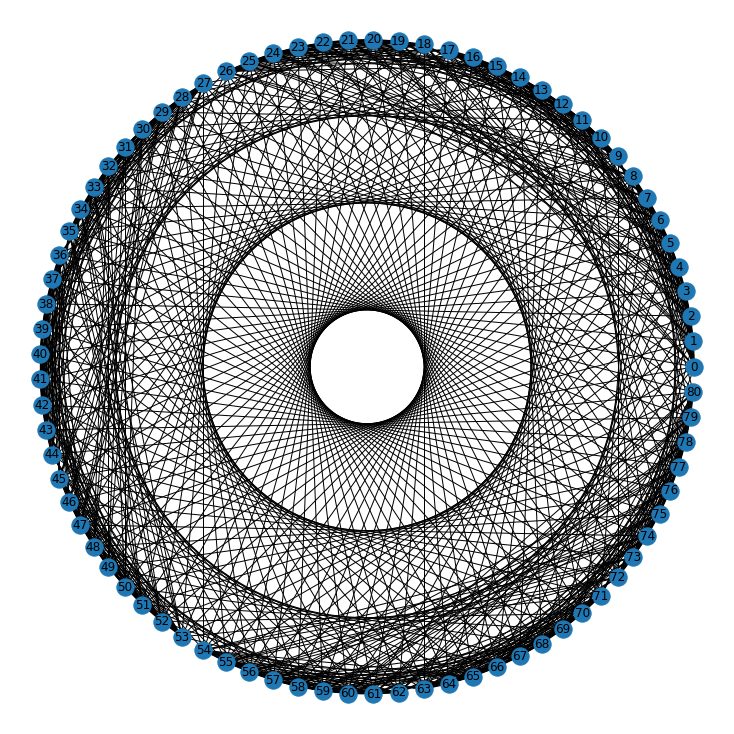

In [7]:
g_sudoku = generate_sudoku(n = 3)
plt.figure(figsize = (10, 10))
nx.draw_circular(g_sudoku, with_labels = True)

In [8]:
sorted(g_sudoku.neighbors(1))

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 18, 19, 20, 28, 37, 46, 55, 64, 73]

#### Sample of a Complete and Incomplete Sudoku Puzzles

In [9]:
sudoku_test = [[5, 3, 4, 6, 7, 8, 9, 1, 2],
               [6, 7, 2, 1, 9, 5, 3, 4, 8],
               [1, 9, 8, 3, 4, 2, 5, 6, 7],
               [8, 5, 9, 7, 6, 1, 4, 2, 3],
               [4, 2, 6, 8, 5, 3, 7, 9, 1],
               [7, 1, 3, 9, 2, 4, 8, 5, 6],
               [9, 6, 1, 5, 3, 7, 2, 8, 4],
               [2, 8, 7, 4, 1, 9, 6, 3, 5],
               [3, 4, 5, 2, 8, 6, 1, 7, 9]]

sudoku_test2 = [[0, 3, 0, 0, 1, 0, 0, 6, 0],
                [7, 5, 0, 0, 3, 0, 0, 4, 8],
                [0, 0, 6, 9, 8, 4, 3, 0, 0],
                [0, 0, 3, 0, 0, 0, 8, 0, 0],
                [9, 1, 2, 0, 0, 0, 6, 7, 4],
                [0, 0, 4, 0, 0, 0, 5, 0, 0],
                [0, 0, 1, 6, 7, 5, 2, 0, 0],
                [6, 8, 0, 0, 9, 0, 0, 1, 5],
                [0, 9, 0, 0, 4, 0, 0, 3, 0]]

#### Creating a Sudoku Checker based on Graph Theory / Networkx

In [10]:
def sudoku_checker(graph, filled_in, n):
    grid_dim = pow(n, 2)
    grid_label = dict()
    row_tracker = 0
    col_tracker = 0
    grid_tracker = 0
    grid = [[0 for i in range(grid_dim)] for y in range(grid_dim)]
    result = False
    
    # labeling the filled-in sudoku
    for node in range(graph.number_of_nodes()):
        grid_label[node] = filled_in[row_tracker][col_tracker]
        
        if col_tracker == 8:
            row_tracker += 1
            col_tracker = 0
        else: col_tracker += 1
    
    # checking the neighbor cells
    for node in range(graph.number_of_nodes()):
        neighbors = [grid_label[x] for x in sorted(graph.neighbors(node))]
        
        if grid_label[node] not in neighbors:
            result = True
        if grid_label[node] in neighbors:
            result = False
            break
    
    # transferring into a multi-dimensional array
    for row in grid:
        for col in row:
            col = grid_label[grid_tracker]
            print('{0} '.format(col), end = '')
            grid_tracker += 1
        print()
    
    return result

In [11]:
if sudoku_checker(g_sudoku, sudoku_test, 3):
    print('Correct')

5 3 4 6 7 8 9 1 2 
6 7 2 1 9 5 3 4 8 
1 9 8 3 4 2 5 6 7 
8 5 9 7 6 1 4 2 3 
4 2 6 8 5 3 7 9 1 
7 1 3 9 2 4 8 5 6 
9 6 1 5 3 7 2 8 4 
2 8 7 4 1 9 6 3 5 
3 4 5 2 8 6 1 7 9 
Correct


#### Creating a Sudoku Solver based on Graph Theory / Networkx

In [12]:
def sudoku_solver(graph, sudoku, n):
    grid_label = dict()
    grid_dim = pow(n, 2)
    grid_size = pow(n, 4)
    grid_values = list(range(1, grid_dim + 1))
    grid = [[0 for i in range(grid_dim)] for y in range(grid_dim)]
    row_tracker = 0
    col_tracker = 0
    grid_tracker = 0
    isFilled = False
    
    # filling in a dictionary of all values of the sudoku
    for node in range(graph.number_of_nodes()):
        grid_label[node] = sudoku[row_tracker][col_tracker]
        
        if col_tracker == 8:
            row_tracker += 1
            col_tracker = 0
        else: col_tracker += 1
            
    # filling in the cells
    while not isFilled:
        counter = 0
        for node in range(graph.number_of_nodes()):
            neighbors = []
            if grid_label[node] == 0:
                neighbors_values = [grid_label[cell] for cell in sorted(graph.neighbors(node))]
                possible = [num for num in grid_values if num not in set(neighbors_values)]                
                
                if len(possible) == 1:
                    grid_label[node] = possible[0]
                    break
        # checker 
        for node in range(graph.number_of_nodes()):
            if grid_label[node] == 0:
                break
            counter += 1
        
        if counter == grid_size:
            isFilled = True
            break
            
    # making an n x n grid with filled values
    for row in range(grid_dim):
        for col in range(grid_dim):
            column = grid_label[grid_tracker]
            grid[row][col] = column
            grid_tracker += 1
                    
    return grid

In [13]:
if sudoku_checker(g_sudoku, sudoku_solver(g_sudoku, sudoku_test2, 3), 3):
    print('Correct')

4 3 8 5 1 7 9 6 2 
7 5 9 2 3 6 1 4 8 
1 2 6 9 8 4 3 5 7 
5 7 3 4 6 9 8 2 1 
9 1 2 8 5 3 6 7 4 
8 6 4 7 2 1 5 9 3 
3 4 1 6 7 5 2 8 9 
6 8 7 3 9 2 4 1 5 
2 9 5 1 4 8 7 3 6 
Correct
